In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt

## Preprocessing

In [2]:
df = pd.read_csv('../data/cleaned/final-cleaned.csv')

In [3]:
df

,category_id,category,articles
0,0,opinion,congress much protect american served country predatory profit college
1,1,world,attack civilian site syria grown frequent u n launch rare inquiry document violation investigation limit scope final report make public new york time inves
2,1,world,week relative calm end wednesday people march large number police deploy gas pepper spray
3,2,politics,president monitor middle east crisis golf club threaten iran implored reporter honorable
4,3,arts,linda ronstadt sound voice air cnn new season doctor kick bbc america
...,...,...,...
2336,4,business,former bos premium cable network talk former vice medium executive making documentary
2337,2,politics,lobby president washington hotel supporter remain unwavering business remain brisk
2338,5,sports,lakers first game bryant daughter gianna die helicopter crash sunday lebron james give heartfelt speech game
2339,5,sports,famed run coach already bar sport year dope violation temporarily ban u center safesport action produce lifetime ban


In [4]:
y = np.array(df.category_id.values)
x = df.articles

In [5]:
cv = CountVectorizer(max_features = 5000)

In [6]:
mtr = cv.fit_transform(x.values.astype('U'))

In [7]:
x = pd.DataFrame(mtr.toarray(),columns=cv.get_feature_names())

In [8]:
x

,21st,49ers,50th,aaron,abandon,abbas,abbott,abc,abdicate,abdul,...,zephyr,zhao,zindani,zion,zionism,zoey,zone,zoning,zuberi,zverev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2339,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (2341, 5000)
y.shape =  (2341,)


## Split Train/Test

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1638
703
1638
703


([<matplotlib.patches.Wedge at 0x20f91fd47f0>,
 [Text(-0.6457275908292802, 0.8905256191945372, 'Train'),
  Text(0.6457276742063026, -0.8905255587371533, 'Test')])

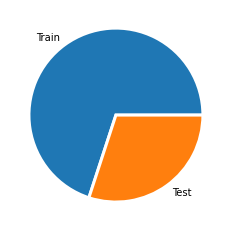

In [11]:
labels = 'Train', 'Test'
plt.pie([len(x_train), len(x_test)], labels=labels, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

## Model Selection

In [12]:
def run_model(model_name, est_c, est_pnlty):
    mdl=''
    if model_name == 'Logistic Regression':
        mdl = LogisticRegression()
    elif model_name == 'Random Forest':
        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)
    elif model_name == 'Multinomial Naive Bayes':
        mdl = MultinomialNB(alpha=1.0,fit_prior=True)
    elif model_name == 'Support Vector Classifer':
        mdl = SVC()
    elif model_name == 'Decision Tree Classifier':
        mdl = DecisionTreeClassifier()
    elif model_name == 'K Nearest Neighbour':
        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    elif model_name == 'Gaussian Naive Bayes':
        mdl = GaussianNB()
    oneVsRest = OneVsRestClassifier(mdl)
    oneVsRest.fit(x_train, y_train)
    y_pred = oneVsRest.predict(x_test)
    # Performance metrics
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2) 
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return [round(accuracy,2), round(precision,2), round(recall,2), round(f1score,2)]

In [13]:
ml_score = [run_model('Logistic Regression', est_c=None, est_pnlty=None), 
            run_model('Random Forest', est_c=None, est_pnlty=None), 
            run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None), 
            run_model('Support Vector Classifer', est_c=None, est_pnlty=None),
            run_model('Decision Tree Classifier', est_c=None, est_pnlty=None),
            run_model('K Nearest Neighbour', est_c=None, est_pnlty=None),
            run_model('Gaussian Naive Bayes', est_c=None, est_pnlty=None)
           ]

In [14]:
model_score = pd.DataFrame(data=ml_score, index=['Logistic Regression', 'Random Forest', 'Multinomial Naive Bayes', 'Support Vector Classifer', 'Decision Tree Classifier', 'K Nearest Neighbour', 'Gaussian Naive Bayes'], columns=['Accuracy', 'Precision', 'Recall', 'F1'])

In [15]:
model_score

,Accuracy,Precision,Recall,F1
Logistic Regression,69.56,0.70,0.70,0.70
Random Forest,69.70,0.70,0.70,0.70
Multinomial Naive Bayes,68.56,0.69,0.69,0.69
Support Vector Classifer,70.13,0.70,0.70,0.70
Decision Tree Classifier,49.36,0.49,0.49,0.49
K Nearest Neighbour,26.46,0.26,0.26,0.26
Gaussian Naive Bayes,38.69,0.39,0.39,0.39


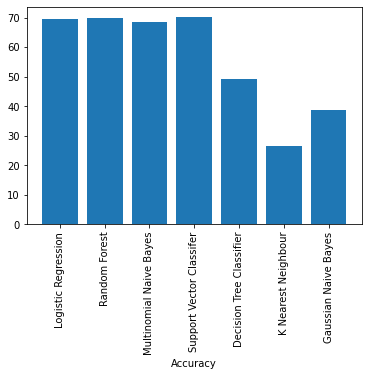

In [16]:
plt.bar(model_score.index, model_score['Accuracy'])
plt.xticks(rotation=90) 
plt.xlabel('Accuracy')
plt.show();

## Fine-Tune

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 160, num = 20)] 
max_features = ['auto', 'sqrt']
max_depth = [None,2]
min_samples_split = [2,4]
min_samples_leaf = [1,2]
bootsrap = [True, True]

In [ ]:
param_grid =  {'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf,
                'bootstrap' : bootsrap}
print(param_grid)

In [ ]:
Rd = RandomForestClassifier()
rd_Grid = GridSearchCV(estimator=Rd, param_grid=param_grid, cv=5, verbose=2)

In [ ]:
rd_Grid.fit(x_train, y_train)

In [101]:
rd_Grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 152}

## Prediction

In [102]:
classifier = RandomForestClassifier(n_estimators=152, max_depth=10, max_features='auto', min_samples_split=10).fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [103]:
text = ['Trump republican']

In [104]:
y_cv = cv.transform(text)
yy = classifier.predict(y_cv)
result = ""
if yy == [0]:
    result = "opinion"
elif yy == [1]:
    result = "world"
elif yy == [2]:
    result = "Politics News"
elif yy == [3]:
    result = "arts"
elif yy == [4]:
    result = "business"
elif yy == [5]:
    result = "sports"
print(result)

Politics News


## Evaluation

In [105]:
confusion_matrix(y_test, y_pred)

array([[108,  10,  20,   2,   0,   0],
       [ 62,  71,  21,   1,   0,   0],
       [ 17,   7, 123,   0,   0,   0],
       [ 58,   2,  11,  30,   0,   0],
       [ 73,  10,  12,   0,   3,   0],
       [ 48,   2,   1,   1,   0,  10]], dtype=int64)

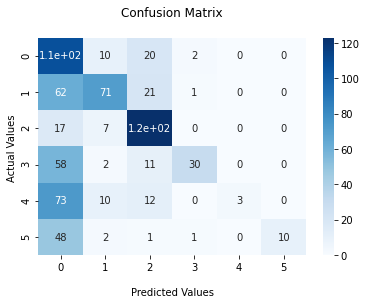

In [106]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [108]:
[round(accuracy_score(y_test, y_pred) * 100, 2), ]

[49.08]